In [ ]:
from google.colab import files

In [ ]:
files.upload()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [ ]:
df=pd.read_csv('WineQT.csv')

In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [ ]:
df=df.drop(['Id'],axis=1)

In [ ]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


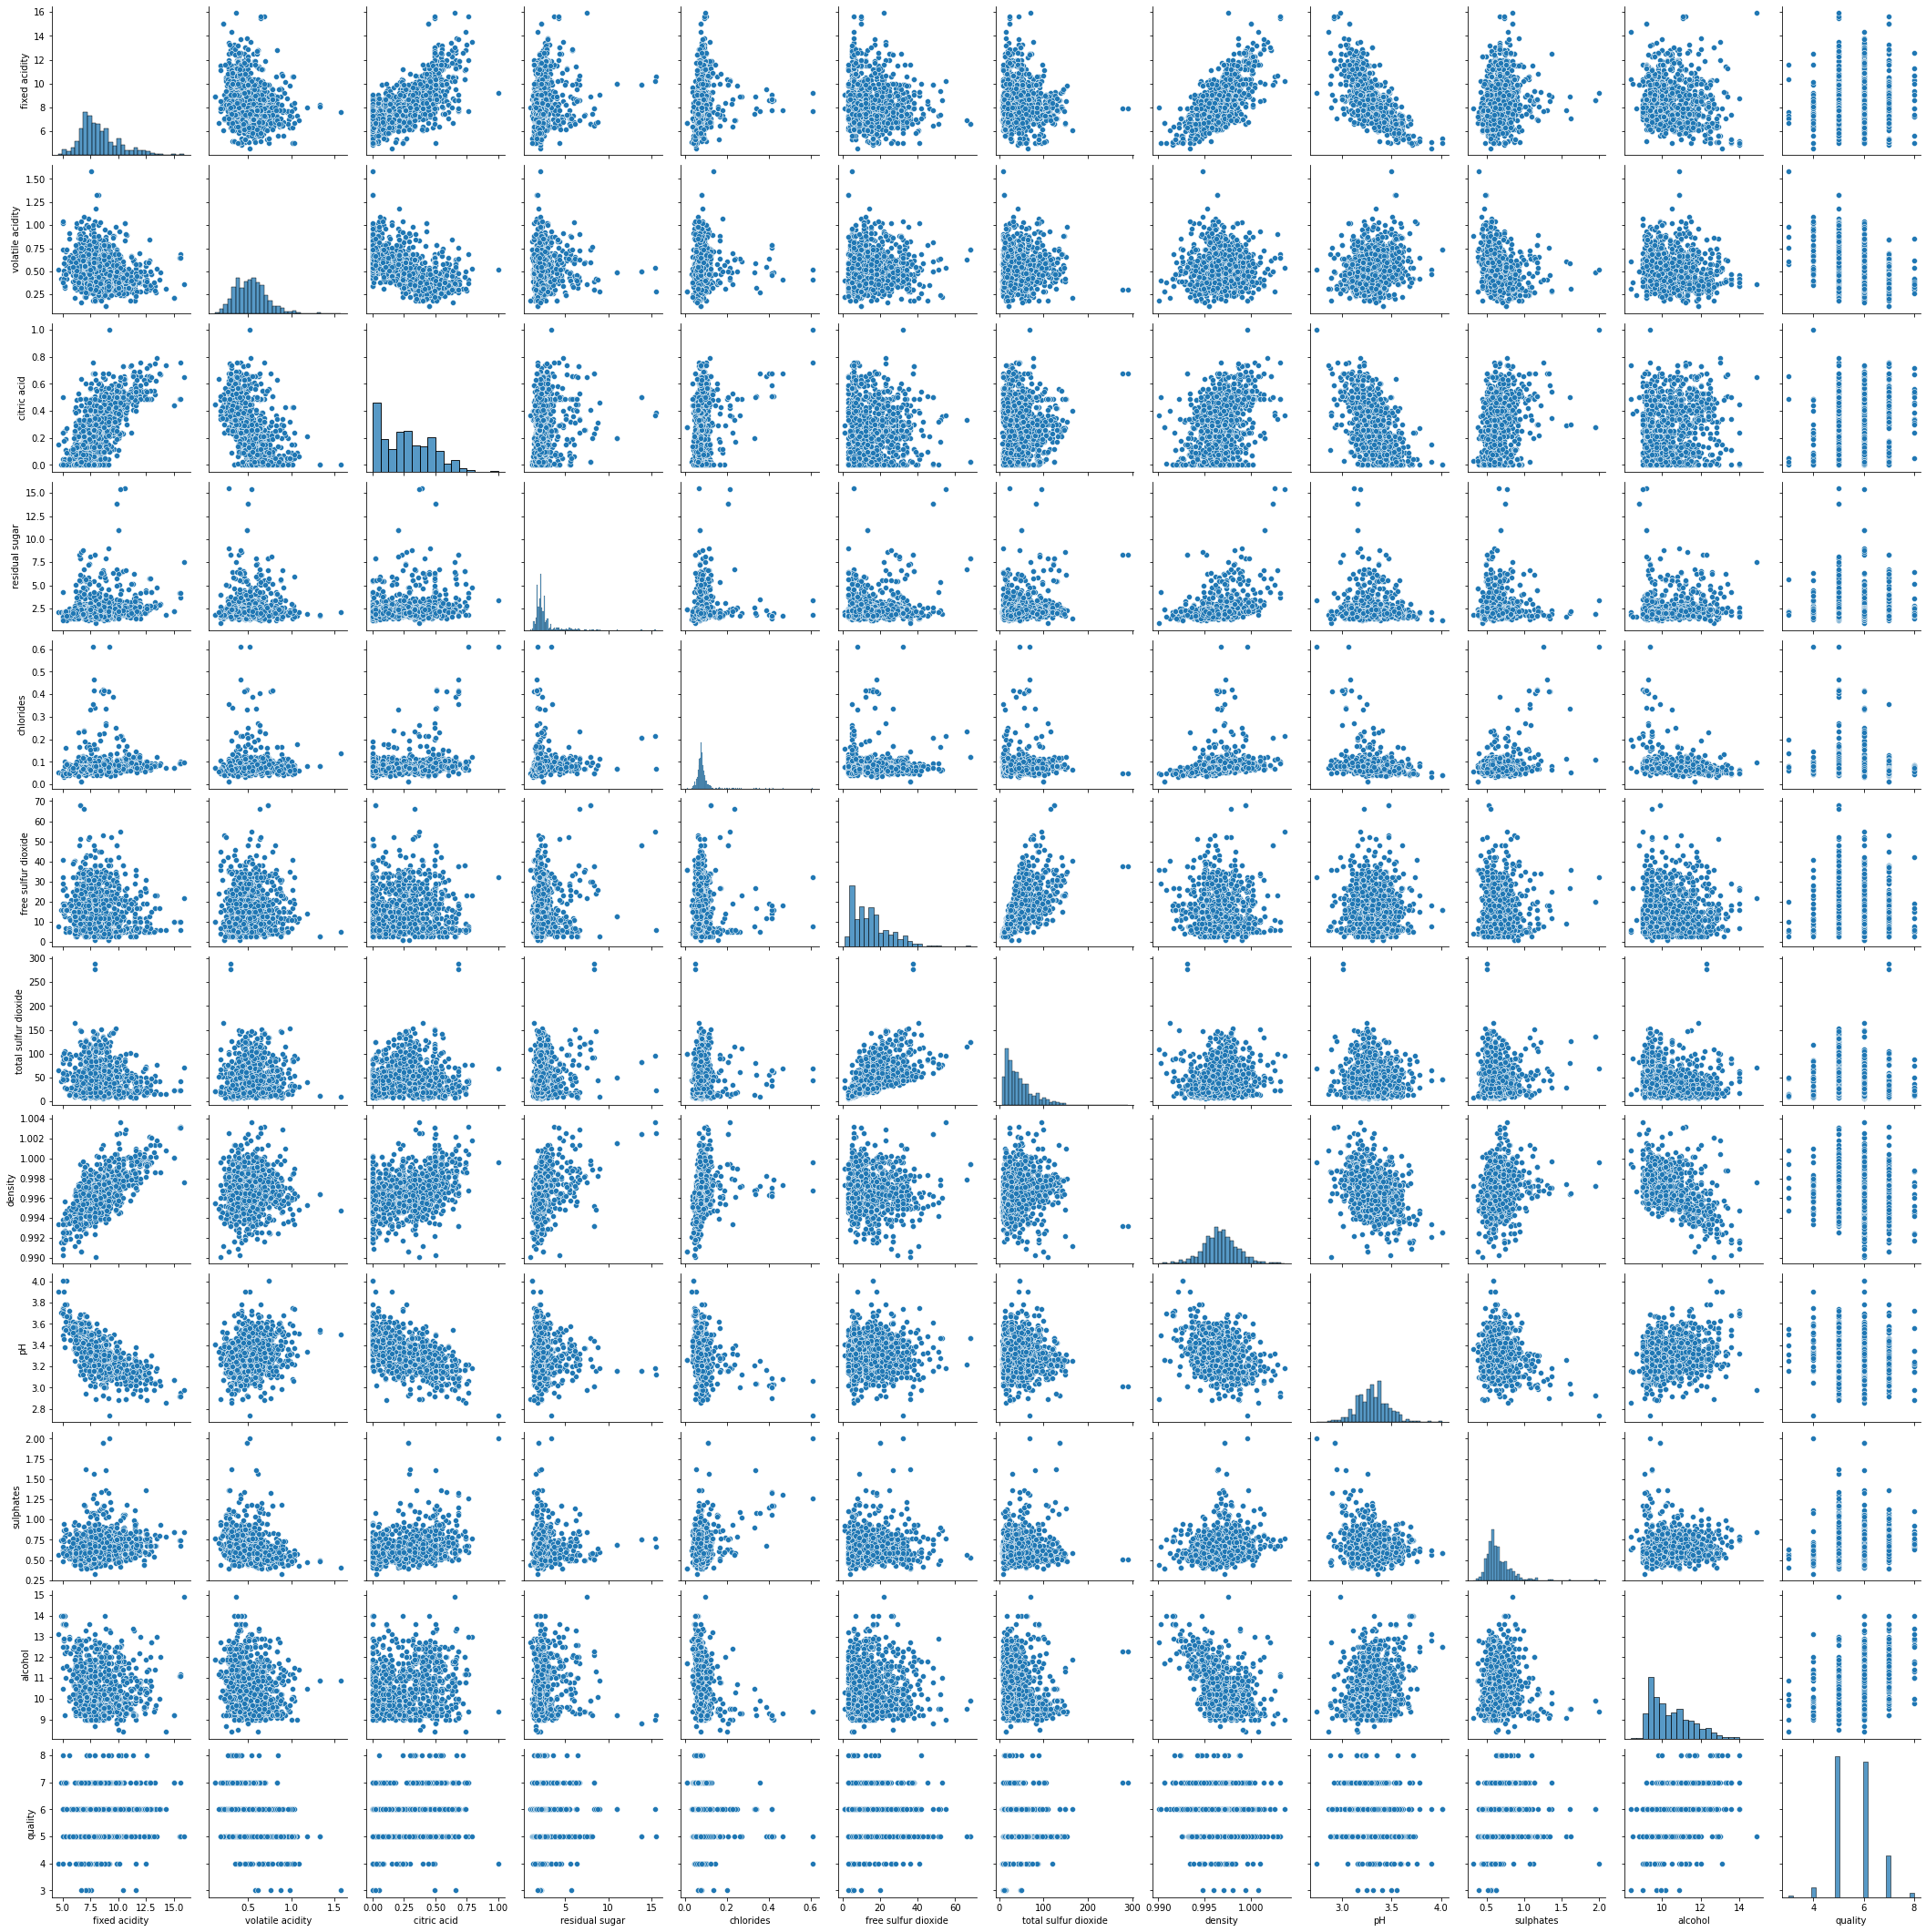

In [ ]:
sns.pairplot(data=df)

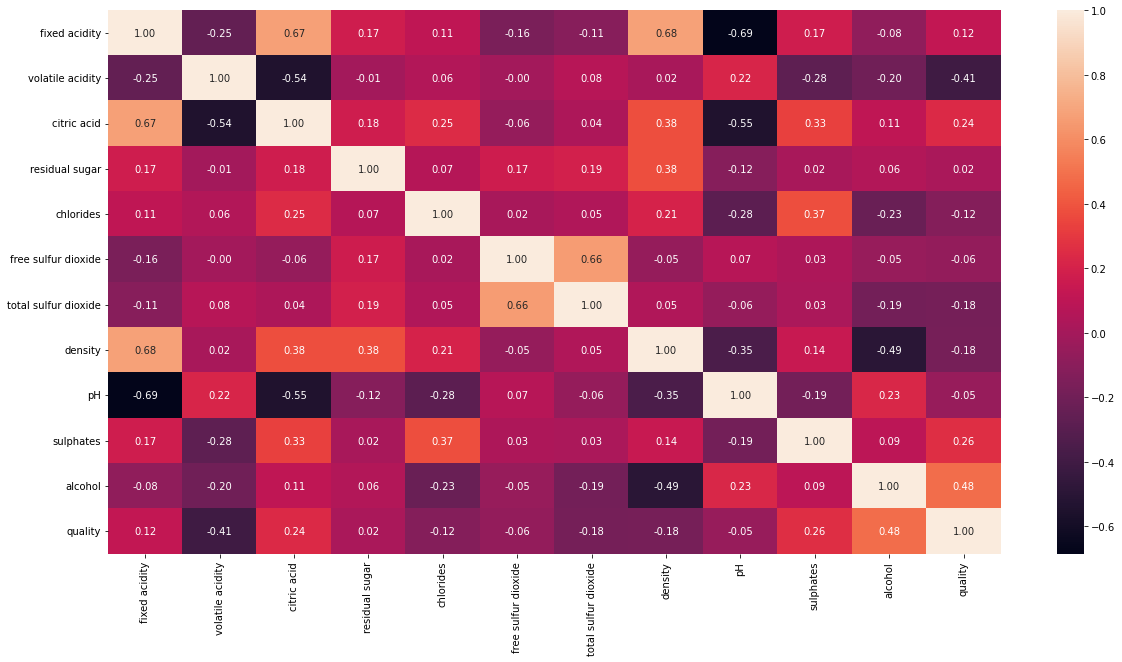

In [ ]:
corelation=df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corelation,annot=True,fmt='0.2f')

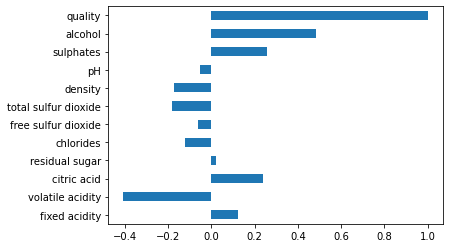

In [ ]:
pd.Series(df.corr()['quality']).plot(kind='barh')

In [ ]:
df=df[pd.Series(df.corr()['quality']).nlargest(8).keys()]

In [ ]:
x=df.drop(['quality'],axis=1)
y=df['quality']

In [ ]:
k_range=range(1,15)
wcss=[]
for i in k_range:
  kmeans=KMeans(n_clusters=i)
  kmeans.fit(x,y)
  wcss.append(kmeans.inertia_)

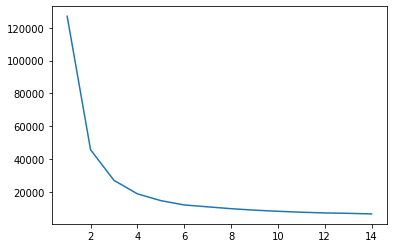

In [ ]:
plt.plot(k_range,wcss)

In [ ]:
kmeans=KMeans(n_clusters=5)

In [ ]:
kmeans.fit(x,y)

KMeans(n_clusters=5)

In [ ]:
pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5,6
0,10.492685,0.653145,0.302783,8.838914,2.496267,3.282647,6.536199
1,10.460105,0.650630,0.223727,7.869029,2.341864,3.342730,14.790026
2,10.334557,0.658899,0.276514,7.986239,2.715596,3.300550,34.444954
3,10.375385,0.680718,0.275795,8.183590,2.615897,3.316564,24.235897
4,10.162500,0.663750,0.234375,8.025000,5.784375,3.343125,52.750000


In [ ]:
df['Labels']=kmeans.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df['Labels'].value_counts()

0    442
1    381
3    195
2    109
4     16
Name: Labels, dtype: int64

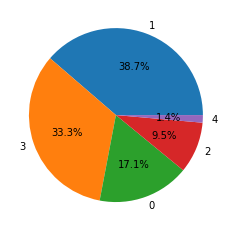

In [ ]:
plt.pie(list(df['Labels'].value_counts()),labels=[1,3,0,2,4],autopct='%2.1f%%')
plt.show()

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
Reg=LinearRegression()
Tree=DecisionTreeRegressor()
Forest=RandomForestRegressor()
KNN=KNeighborsRegressor()
Support=SVR(gamma='auto')
XGB=XGBRegressor()

In [ ]:
Algo=[Reg,Tree,Forest,KNN,Support,XGB]
r2=[]
mse=[]
mae=[]
for K in Algo:
  K.fit(xtrain,ytrain)
  pred=K.predict(xtest)
  r2.append(r2_score(ytest,pred))
  mse.append(mean_squared_error(ytest,pred))
  mae.append(mean_absolute_error(ytest,pred))

[14:47:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
Algo_name=pd.DataFrame(["Reg","Tree","Forest","KNN","Support","XGB"],columns=['Algorithms'])
mse=pd.DataFrame(mse,columns=['Mean Squared Error'])
mae=pd.DataFrame(mae,columns=['Mean Absolute Error'])
r2=pd.DataFrame(r2,columns=['Scores'])

In [ ]:
Table=pd.concat([Algo_name,mse],axis=1)
Table=pd.concat([Table,mae],axis=1)
Table=pd.concat([Table,r2],axis=1)
Table

,Algorithms,Mean Squared Error,Mean Absolute Error,Scores
0,Reg,0.421409,0.511693,0.328295
1,Tree,0.707424,0.524017,-0.127599
2,Forest,0.341342,0.438341,0.455917
3,KNN,0.462183,0.508297,0.263302
4,Support,0.440198,0.488435,0.298345
5,XGB,0.395543,0.489770,0.369524


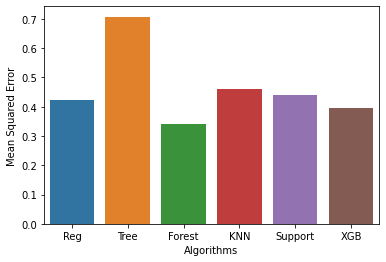

In [ ]:
sns.barplot(x='Algorithms',y='Mean Squared Error',data=Table)

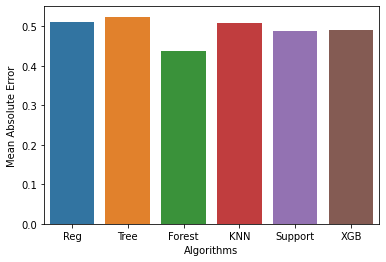

In [ ]:
sns.barplot(x='Algorithms',y='Mean Absolute Error',data=Table)

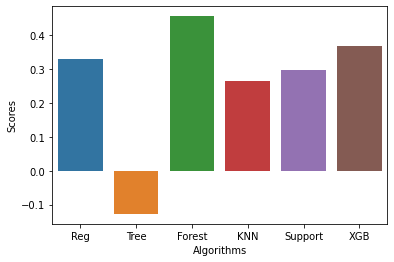

In [ ]:
sns.barplot(x='Algorithms',y='Scores',data=Table)